# Introduction
This Project is on a data set contains about 113937 loans with 81 variables on each loan.

The main purpose of this project is to summarize the characteristics btw the Loan Rate , Employee status , Loan Quater ,CreditScore among multiple variable using summary statics and data visualizations.

In [1]:
#import all required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [2]:
# Defining the colour palette list

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

In [3]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
# load the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')


In [5]:
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

In [6]:
# remove columns and columns with empty values that are not useful in the Dateset
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan_2['ProsperRating (Alpha)'] = df_loan_2['ProsperRating (Alpha)'].astype(ordered_var)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Univariate Exploration

## Occupations of borrowers

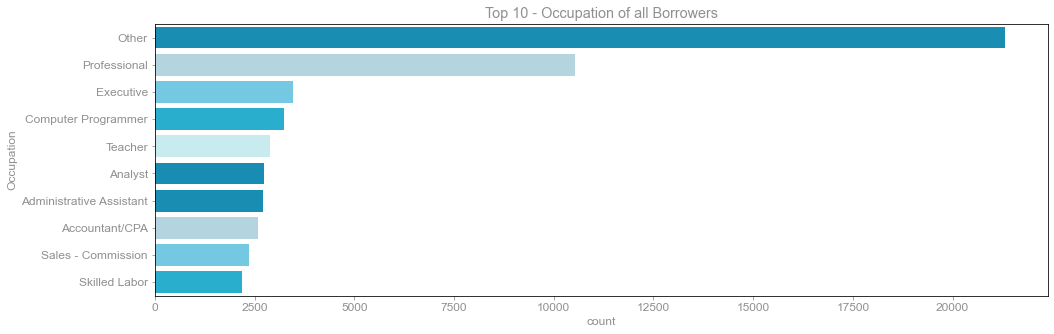

In [8]:
# see the top 10 occupations of borrowers
plt.figure(figsize = [16, 5]) 

sb.countplot(data = df_loan_2, y = 'Occupation', palette = color_palette_list,
             order = df_loan_2['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");
plt.savefig('Top 10 - Occupation of all Borrowers', bbox_inches='tight')

**Insights:**

As we can see that the number of borrowers from other field is around 21317 where as the professional are having 10542 



## Current Loan Status

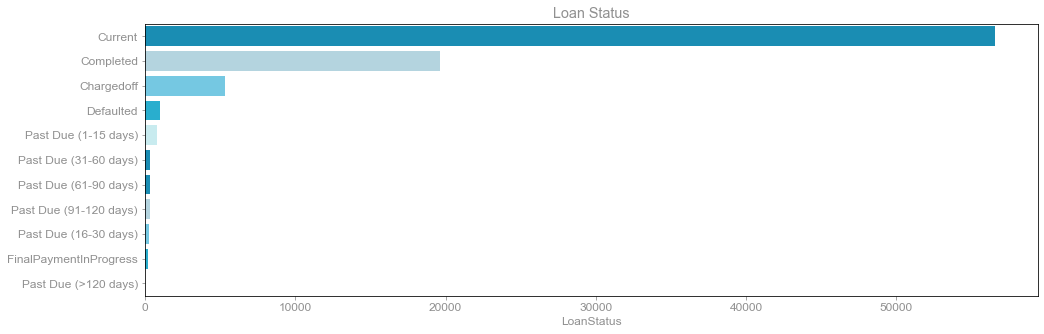

In [9]:
# What is the loan Status?
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(y=df_loan_2['LoanStatus'].value_counts().index, x=df_loan_2['LoanStatus'].value_counts(),palette = color_palette_list )
plt.title("Loan Status");
plt.savefig('Loan Status', bbox_inches='tight')

**Insights:**

- From the above graph we can say their are many  loan status are in current status and few of them are completed.
- 56576 loans status are current and 19664 loan status are completed .

## Employment Status

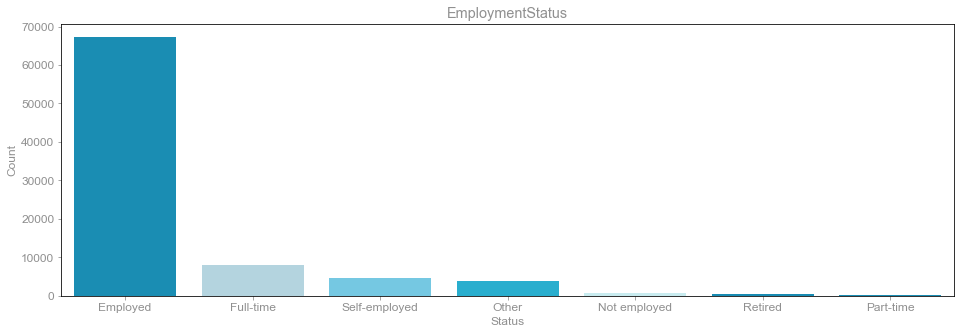

In [10]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['EmploymentStatus'].value_counts().index, y=df_loan_2['EmploymentStatus'].value_counts(),palette = color_palette_list)
ax.set_title("EmploymentStatus")
ax.set_ylabel("Count")
ax.set_xlabel("Status")
plt.savefig('Employment Status', bbox_inches='tight')

## Credit Score Range

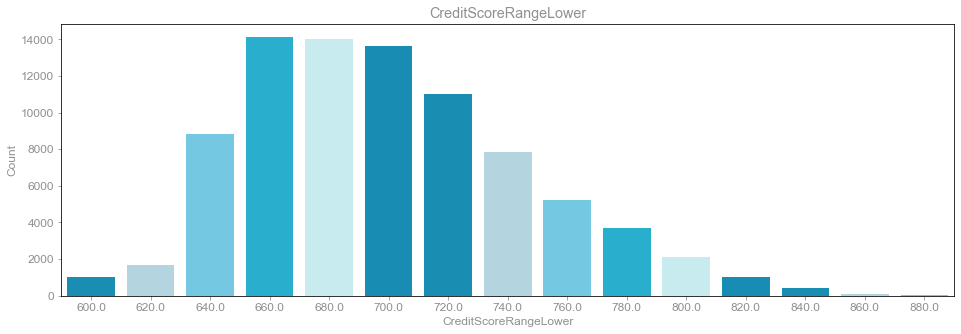

In [11]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['CreditScoreRangeLower'].value_counts().index, y=df_loan_2['CreditScoreRangeLower'].value_counts(),palette = color_palette_list)
ax.set_title("CreditScoreRangeLower")
ax.set_ylabel("Count")
ax.set_xlabel("CreditScoreRangeLower")
plt.savefig('CreditScoreRangeLowe', bbox_inches='tight')

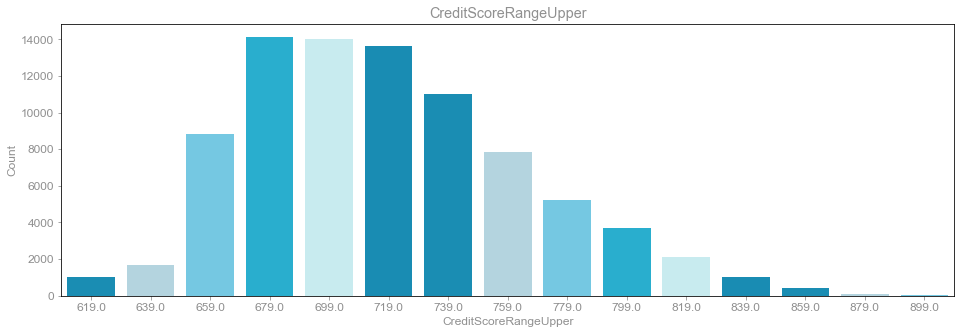

In [12]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['CreditScoreRangeUpper'].value_counts().index, y=df_loan_2['CreditScoreRangeUpper'].value_counts(),palette = color_palette_list)
ax.set_title("CreditScoreRangeUpper")
ax.set_ylabel("Count")
ax.set_xlabel("CreditScoreRangeUpper")
plt.savefig('CreditScoreRangeUpper', bbox_inches='tight')

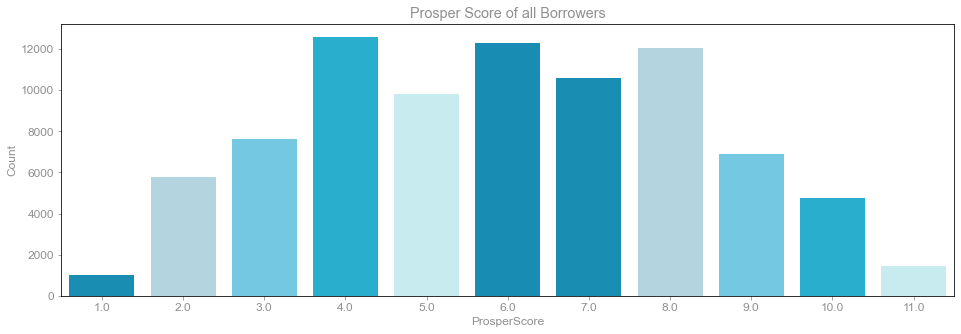

In [13]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['ProsperScore'].value_counts().index, y=df_loan_2['ProsperScore'].value_counts(),palette = color_palette_list)
ax.set_title("Prosper Score of all Borrowers")
ax.set_ylabel("Count")
ax.set_xlabel("ProsperScore")
plt.savefig('ProsperScore', bbox_inches='tight')

## Income Rate distribution

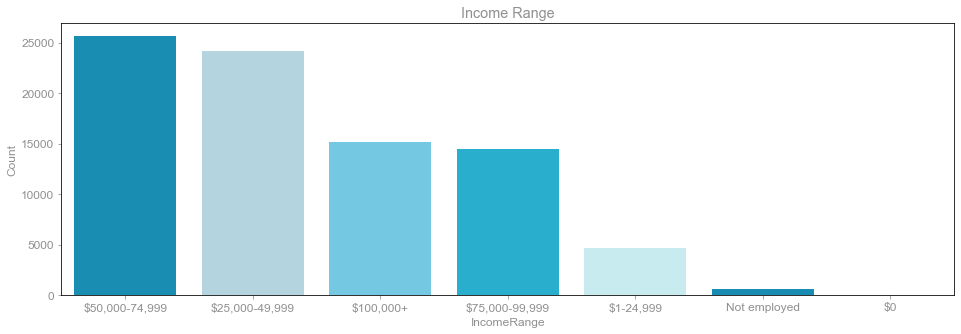

In [14]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['IncomeRange'].value_counts().index, y=df_loan_2['IncomeRange'].value_counts(),palette = color_palette_list)
ax.set_title("Income Range")
ax.set_ylabel("Count")
ax.set_xlabel("IncomeRange")
plt.savefig('IncomeRange', bbox_inches='tight')

In [15]:
df_loan_2['open_year'] = df_loan.ListingCreationDate.str.split('-').str[0]
df_loan_2['close_year'] = df_loan['ClosedDate'].str.slice(start=0, stop=-6)
df_loan_2['close_year'] = pd.to_datetime(df_loan_2['close_year'],format ="%Y-%m-%d %H:%M:%S")
df_loan_2['close_year'] = pd.DatetimeIndex(df_loan_2['close_year']).year
df_loan_2['close_year'].dropna(inplace=True)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

## Borrower Rate at the time of  opening and closing loan year

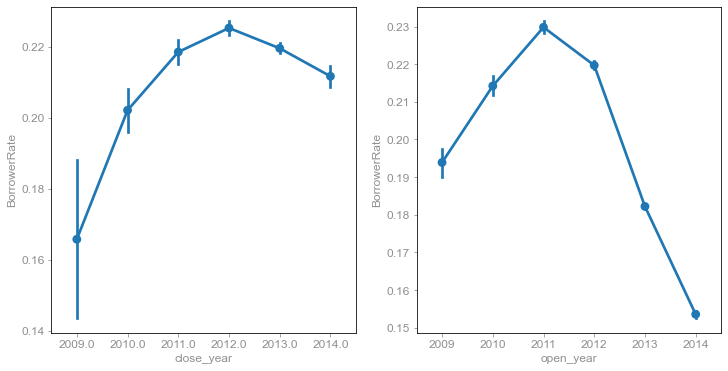

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data=df_loan_2, x='close_year', y='BorrowerRate',ax=ax[0]);

#plt.savefig('borrowerrate-year', bbox_inches='tight')

sb.pointplot(data=df_loan_2, x='open_year', y='BorrowerRate',ax=ax[1]);

#plt.savefig('borrowerrate-year', bbox_inches='tight')

**Insights**

- In 2014 at the time of closing the borrower rate was 0.21 and opening was around 0.16
- As in 2011 their was high borrower rate for the new loans around 0.23

In [17]:
df_loan_2['quateryear'] = df_loan.LoanOriginationQuarter.str.split(' ').str[0]

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Quater in which the loan was originated

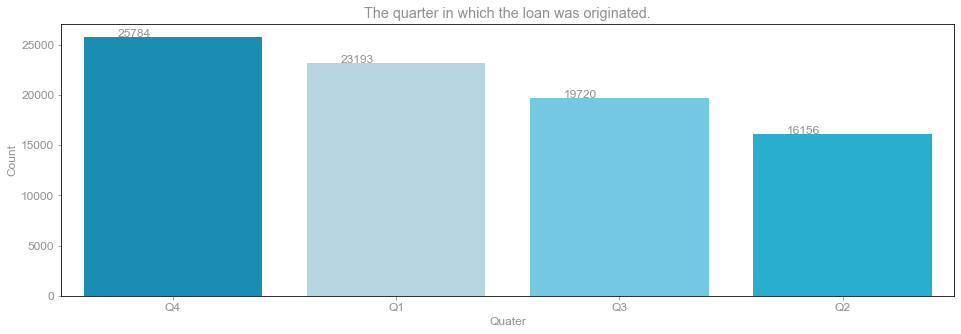

In [18]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['quateryear'].value_counts().index, y=df_loan_2['quateryear'].value_counts(),palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
ax.set_title("The quarter in which the loan was originated.")
ax.set_ylabel("Count")
ax.set_xlabel("Quater")
plt.savefig('quater', bbox_inches='tight')


**Insights**

- In Q4 their was max loan applicant.
- Their was a sudden drop fall after Q1 but then it started increasing .

## Loan Term

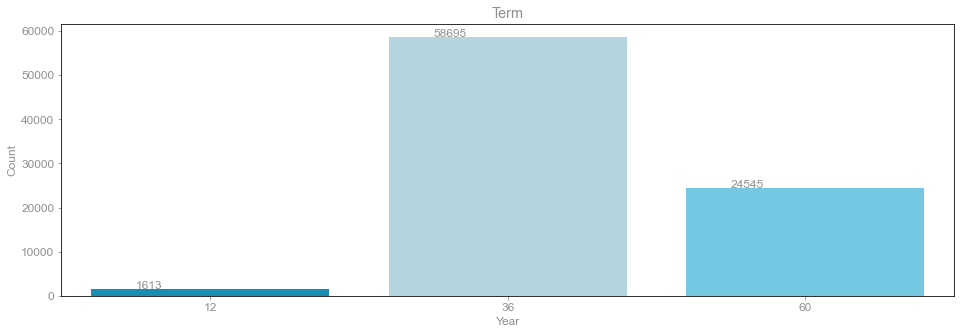

In [19]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['Term'].value_counts().index, y=df_loan_2['Term'].value_counts(),palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
ax.set_title("Term")
ax.set_ylabel("Count")
ax.set_xlabel("Year")
plt.savefig('term-year', bbox_inches='tight')

## Employment Status over Term

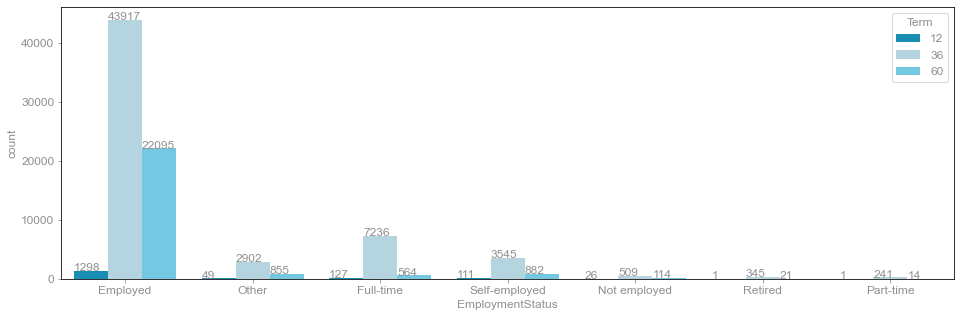

In [20]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'Term', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
plt.savefig('termEmploymentstatus', bbox_inches='tight')

## Employment Status over Income Rate

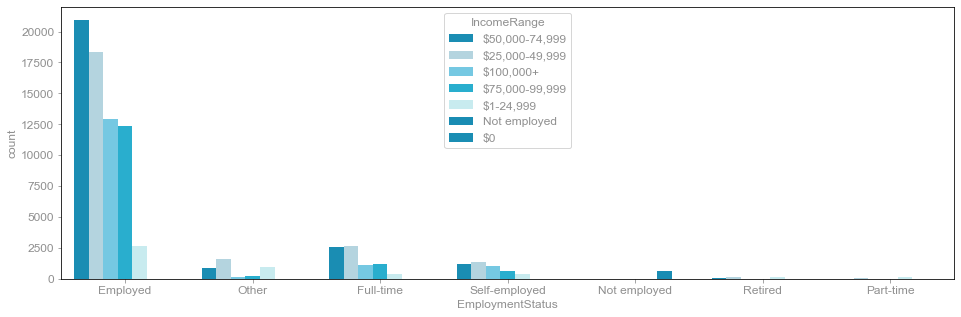

In [21]:
fig, ax = plt.subplots(figsize = (16,5))
sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'IncomeRange', palette = color_palette_list)

**Insights from the Univariate exploration data**




## Bivariate Exploration

## Analyze of No of home owner having employment status

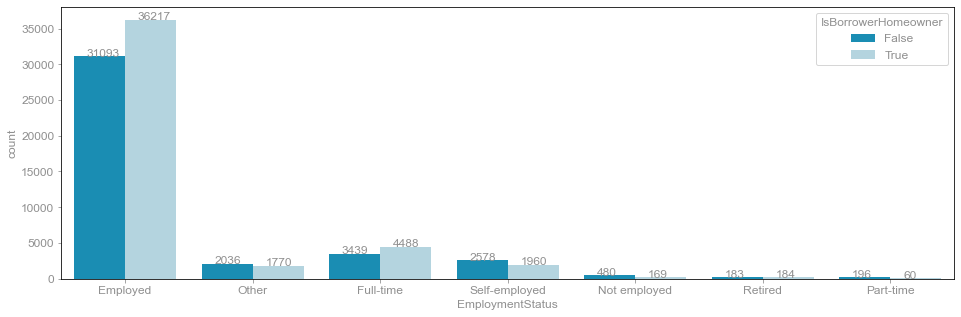

In [22]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.savefig('mEmploymentstatus-homeowner', bbox_inches='tight')

## Loan Term having on Home owner

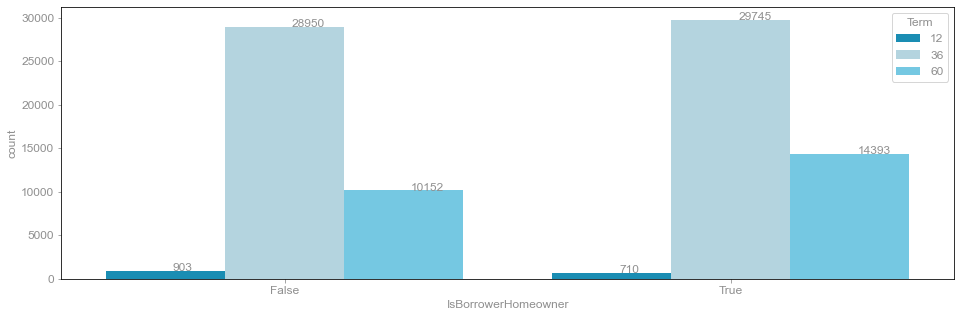

In [23]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'IsBorrowerHomeowner', hue = 'Term', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
plt.savefig('Employmentstatus-Term', bbox_inches='tight')

## Which year home owner take loan ?

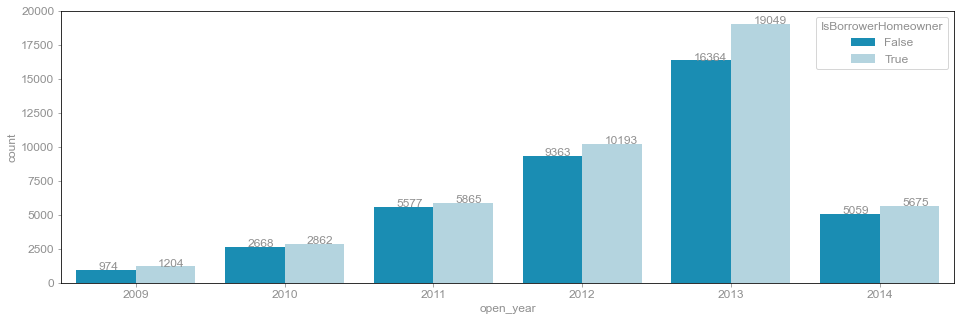

In [24]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'open_year', hue = 'IsBorrowerHomeowner', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

plt.savefig('year-house', bbox_inches='tight')

##  Income Range  vs Prosper rating

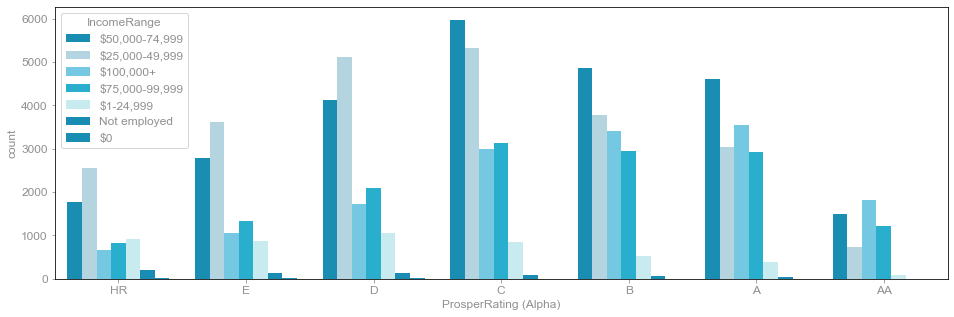

In [25]:
fig, ax = plt.subplots(figsize = (16,5))

sb.countplot(data = df_loan_2, x = 'ProsperRating (Alpha)', hue = 'IncomeRange', palette = color_palette_list)


## Employment status vs ProsperRating


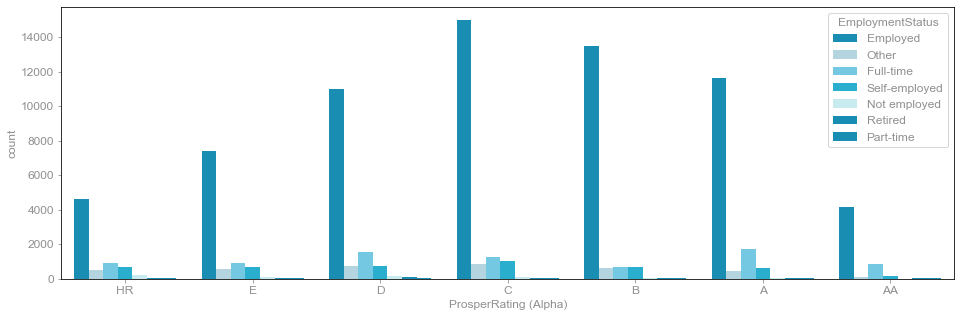

In [26]:
fig, ax = plt.subplots(figsize = (16,5))

sb.countplot(data = df_loan_2, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = color_palette_list)


##  Home owner having loan status

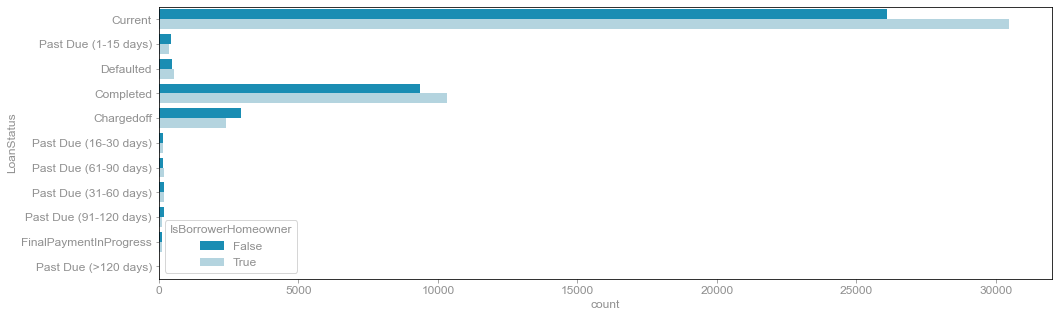

In [27]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, y = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = color_palette_list)

Text(0.5, 1.0, 'Income Range vs Loan Amount')

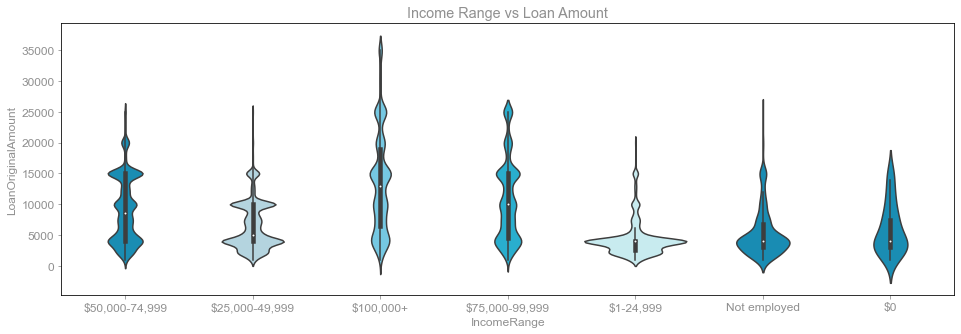

In [28]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sb.violinplot(data = df_loan_2, x = 'IncomeRange', y = 'LoanOriginalAmount', palette = color_palette_list)
plt.title('Income Range vs Loan Amount')

**Insights from the Bivariate exploration data**

- Loan status having current status have their own hown.
- Applicants having C prosper rate have highest employment status .
- Most of the applicant prefer to take 36 months term .
- The range of the salaries stated is higher for employed borrowers.
- Majority of the borrowers are taken by Employed .
- Most of the Non-Houseowner having employed status have highest major part in borrowers.


## Multivariate Exploration

## Analyse which Proper Rating take loan on which term with which borrower rate.

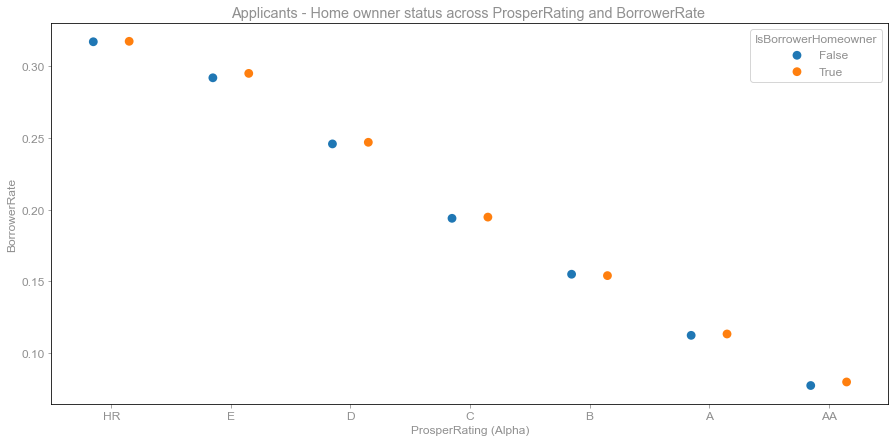

In [31]:
 plt.figure(figsize = [15, 7])

ax = sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

In [32]:
df_loan_3 = df_loan_2.copy()
df_loan_3['LoanStatus'] = df_loan_3['LoanStatus'].astype('category')
ct_counts = df_loan_3.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')


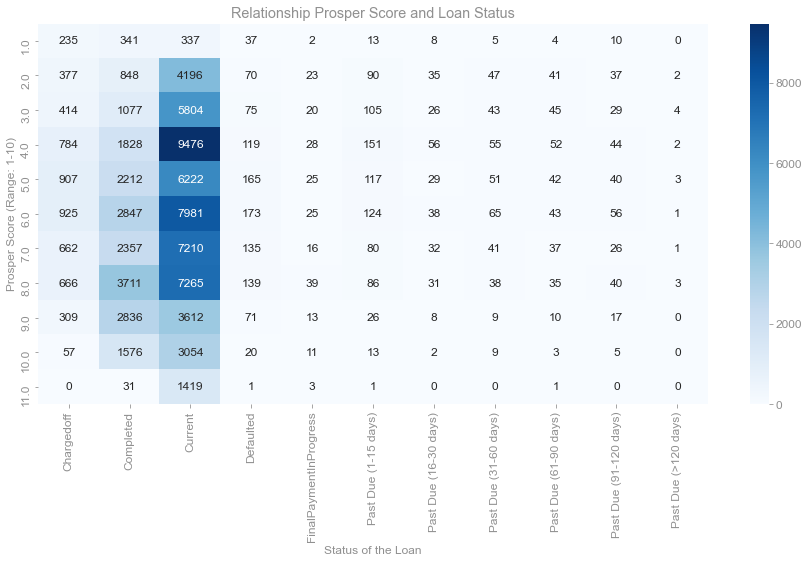

In [33]:
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score (Range: 1-10)')
plt.title('Relationship Prosper Score and Loan Status');

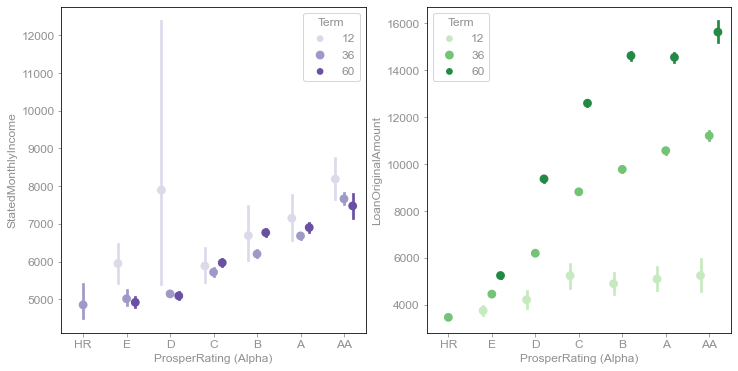

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

**Insights from the multivariate exploration data**

- As the applicant prosper ratings from AA to HR have the highest loan amount.
- AA prsoper Rating have the highest loan amount with highest term also.
- As we can see when the ProsperRating is increasing the BorrowerRate is also increasing .
- As their is no role of houseowner or not both are similarly equal.